In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [17]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score

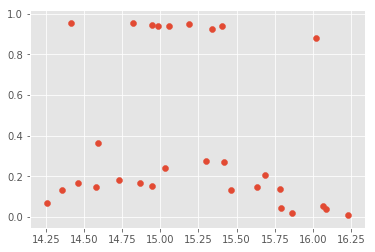

In [22]:
X= np.matrix([ [16.0166, 0.8808], [15.1861, 0.948], [14.4166, 0.9544], [14.9445, 0.9453], [14.9819, 0.9385],  [14.8222,  0.9531], [15.3414, 0.924], [15.4028, 0.9392], [15.05450, .9402],[16.06751154,0.052557509],[16.08441729,0.041273369],[15.78744808,0.042632375],[15.86141587,0.017436804],[14.86759971,0.16751149],[14.57946692,0.14801332],[15.78266388,0.139301133],[15.6345559,0.146763972],[14.25574514,0.070534693],[15.4612203,0.132532201],[14.45973899,0.166314805],[14.35892183,0.133890299],[14.73126592,0.179814686],[14.9465631,0.151571102],[15.68812607,0.208615242],[15.41425557,0.270741797],[16.2312634,0.008745315],[14.58981127,0.363178779],[15.30228795,0.273747982],[15.02918074,0.240614394] ])
y =  X[:,1]
plt.scatter([X[:,0]],[X[:,1]])
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
model = KMeans(n_clusters = 3).fit(X)
y_pred = KMeans(n_clusters = 3).fit_predict(X_test)
assert len(model.cluster_centers_) == 3
assert len(y_pred) == len(y_test)

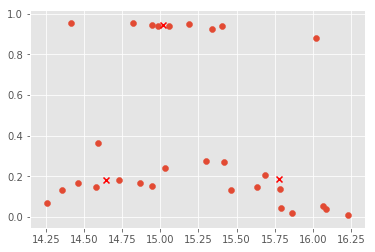

In [20]:
centroids = model.cluster_centers_
plt.scatter([X[:,0]],[X[:,1]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", c="r")
plt.show()